<a href="https://colab.research.google.com/github/mojoshub/data-science/blob/main/VOLATILITY_PRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import io

uploaded = files.upload()


Saving USD_KES 2014 - 2024 DATA.csv to USD_KES 2014 - 2024 DATA.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['USD_KES 2014 - 2024 DATA.csv']))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2835 entries, 0 to 2834
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2835 non-null   object 
 1   Price     2835 non-null   float64
 2   Open      2835 non-null   float64
 3   High      2835 non-null   float64
 4   Low       2835 non-null   float64
 5   Vol.      1013 non-null   object 
 6   Change %  2835 non-null   object 
dtypes: float64(4), object(3)
memory usage: 155.2+ KB


In [ ]:
df = pd.DataFrame(df)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)
df.set_index('Date', inplace=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df.drop(columns = ['Open', 'High', 'Low', 'Vol.', 'Change %'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2835 entries, 2014-01-01 to 2024-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2835 non-null   float64
dtypes: float64(1)
memory usage: 44.3 KB


In [ ]:
df.head()

,Price
Date,
2014-01-01,86.45
2014-01-02,86.90
2014-01-03,86.90
2014-01-06,86.90
2014-01-07,87.05


In [ ]:
df = df.resample("D").mean()

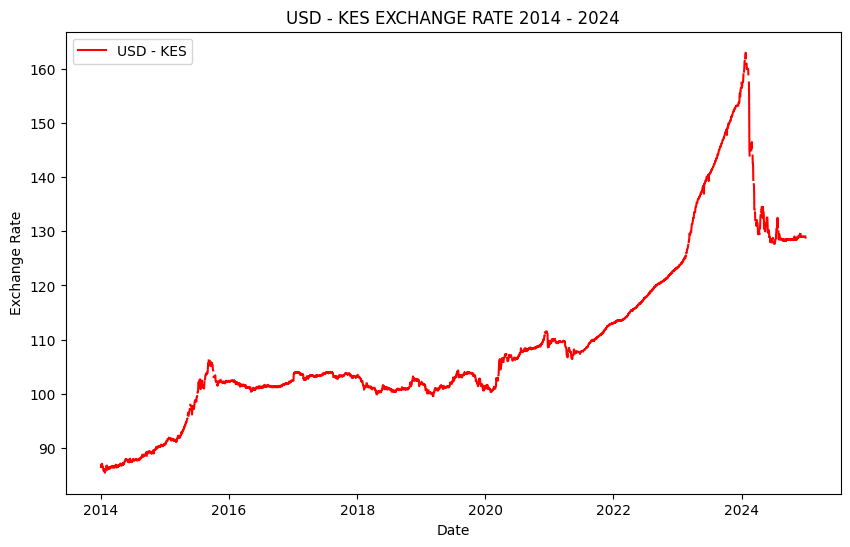

In [ ]:
#plotted the all data points of all the dates.
plt.figure(figsize=(10, 6))
plt.plot(df['Price'], color='red', label = "USD - KES")
plt.title('USD - KES EXCHANGE RATE 2014 - 2024')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [ ]:
df.fillna(method='ffill', inplace=True)

<ipython-input-7-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


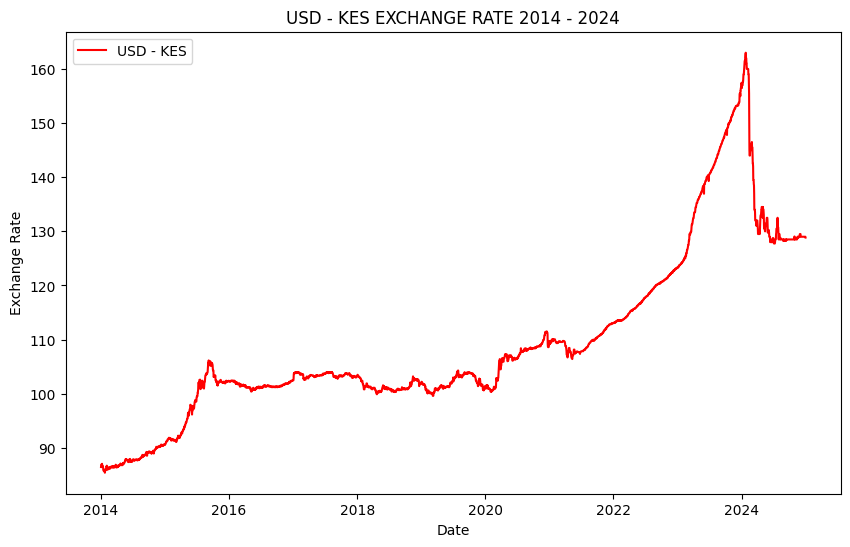

In [ ]:
#plotted the all data points of all the dates.
plt.figure(figsize=(10, 6))
plt.plot(df['Price'], color='red', label = "USD - KES")
plt.title('USD - KES EXCHANGE RATE 2014 - 2024')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [ ]:
#df['Log_Price'] = np.log(df['Price'])

df['Log_Price_Returns'] = np.pad(np.diff(np.log(df['Price'])) * 100, (1, 0), 'constant', constant_values=np.nan)


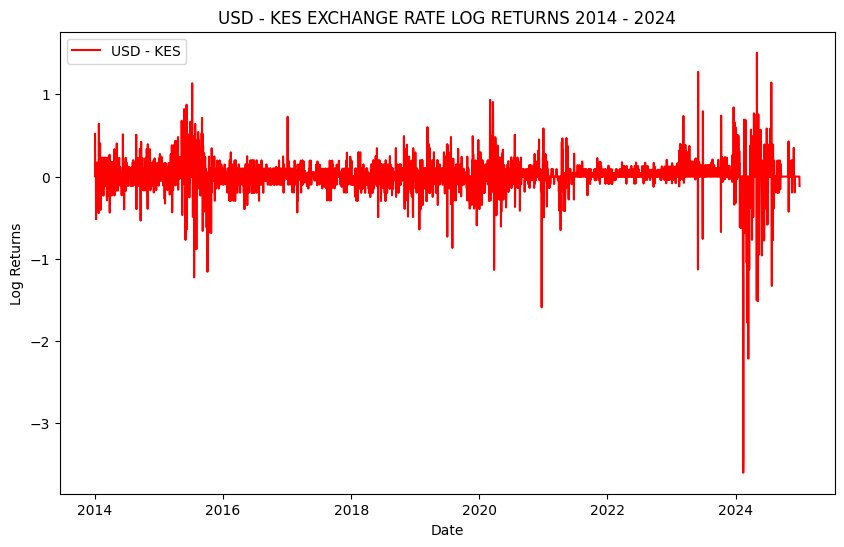

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Log_Price_Returns'], color='red', label = "USD - KES")
plt.title('USD - KES EXCHANGE RATE LOG RETURNS 2014 - 2024')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

<ipython-input-11-5cbd8ca70d71>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
<ipython-input-11-5cbd8ca70d71>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


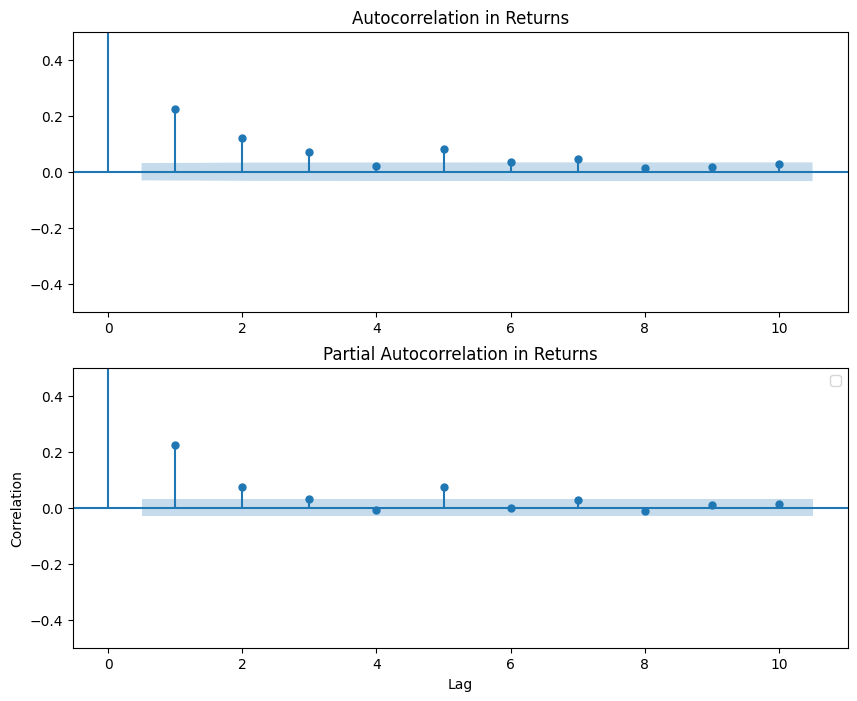

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
log_returns = df['Log_Price_Returns'].iloc[1:]


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(log_returns, ax=ax1, lags=10)
ax1.set_ylim(-0.5, .5)
ax1.set_title("Autocorrelation in Returns")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.legend()

plot_pacf(log_returns, ax=ax2, lags=10)
ax2.set_ylim(-0.5, .5)
ax2.set_xlabel("Lag")
ax2.set_title("Partial Autocorrelation in Returns")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.legend()

plt.show()

In [ ]:
# Add the necessary import for the chi-squared distribution
# this test the model if its stationary
from scipy.stats import chi2

def mcleod_li_test(x, k):
    """
    Calculates the McLeod-Li test statistic for a time series with k lags.
    Returns the test statistic and its p-value.
    """
    n = len(x)
    x_sq = x ** 2
    x_sum = np.sum(x_sq)
    x_lag_sum = np.sum(x_sq[:-k])
    test_stat = n * (n + 2) * x_lag_sum / (x_sum ** 2)
    df = k
    p_value = 1 - chi2.cdf(test_stat, df)
    return test_stat, p_value


test_stat, p_value = mcleod_li_test(df["Log_Price_Returns"], 50)
print("McLeod-Li test statistic: ", test_stat)
print("p-value: ", p_value)

McLeod-Li test statistic:  105353.50567869299
p-value:  0.0


In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 37.0 MB/s eta 0:00:00


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 44.2 MB/s eta 0:00:00


In [ ]:
# Now you can create the arch model
from arch import arch_model
from pmdarima.model_selection import train_test_split


df["Log_Price_Returns"] = df["Log_Price_Returns"].replace([np.inf, -np.inf], np.nan).fillna(0)

# Fit GARCH (1,1)
y_train, y_test = train_test_split(df["Log_Price_Returns"], train_size= 0.8)

garch_mod = arch_model(y_train, mean = "Zero",  vol='Garch', p=1, q=1, rescale=False)
res_garch = garch_mod.fit()

Iteration:      1,   Func. Count:      4,   Neg. LLF: -2226.0668755319994
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2226.0668715887687
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1


In [ ]:
print(res_garch.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:      Log_Price_Returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2226.07
Distribution:                  Normal   AIC:                          -4446.13
Method:            Maximum Likelihood   BIC:                          -4427.91
                                        No. Observations:                 3214
Date:                Thu, Feb 27 2025   Df Residuals:                     3214
Time:                        07:37:42   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.4056e-04  4.213e-04      1.046      0.296 

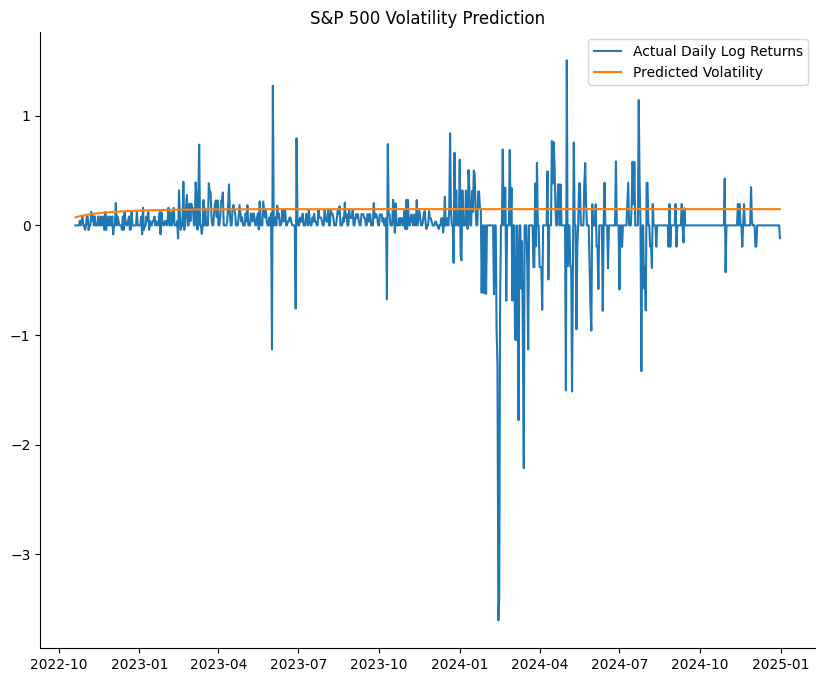

In [ ]:
y_forecast = res_garch.forecast(horizon = y_test.shape[0], reindex=True)

fig,ax = plt.subplots(figsize=(10,8))
ax.spines[['top','right']].set_visible(False)

# Plot test set returns
plt.plot(log_returns[-y_test.shape[0]:])

# Plot volatility estimates for test set
plt.plot(y_test.index, np.sqrt(y_forecast.variance.values[-1,:]))
plt.title('S&P 500 Volatility Prediction')
plt.legend(['Actual Daily Log Returns', 'Predicted Volatility'])

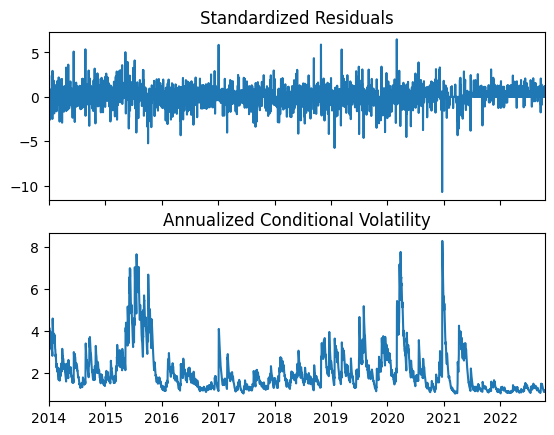

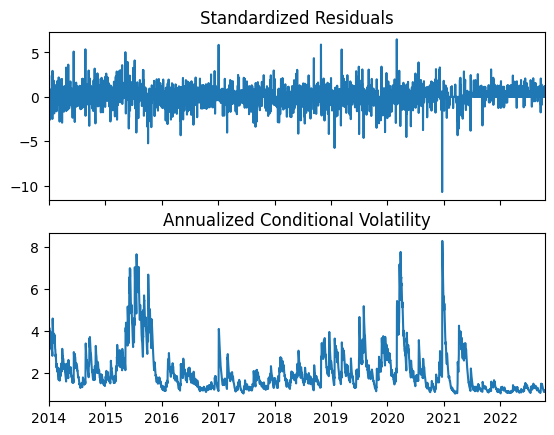

In [ ]:
res_garch.plot(annualize="D")

In [ ]:
rolling_preds = []

for i in range(y_test.shape[0]):
    train = df["Log_Price_Returns"][:-(y_test.shape[0]-i)]
    model = arch_model(train, p=1, q=1, rescale = False)
    model_fit = model.fit(disp='off')
    # One step ahead predictor
    pred = model_fit.forecast(horizon=1, reindex=True)
    rolling_preds.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_preds = pd.Series(rolling_preds, index=y_test.index)

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Text(0.5, 1.0, 'S&P 500 Rolling Volatility Prediction')

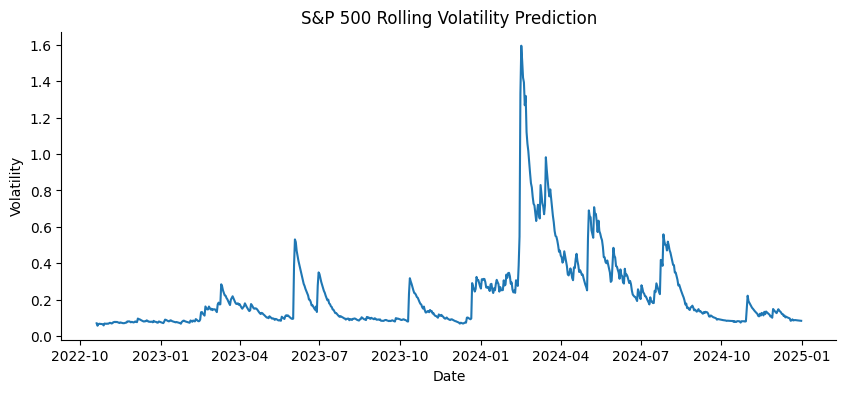

In [ ]:
# Plot of predicted test data rolling volatility predictions
fig,ax = plt.subplots(figsize=(10,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(rolling_preds)
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('S&P 500 Rolling Volatility Prediction')

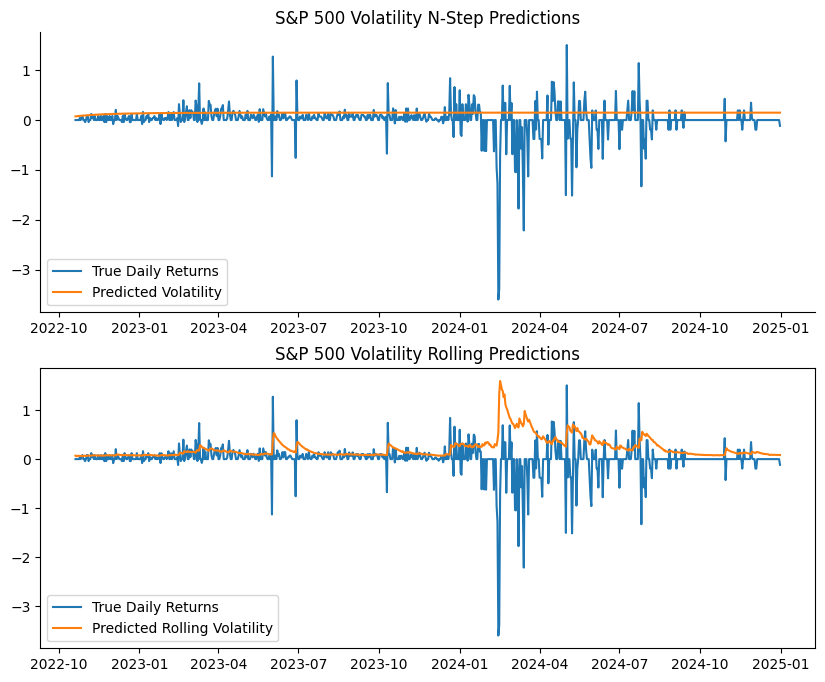

In [ ]:
# Compare n-step-ahead and one-step-ahead rolling predictions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.spines[['top','right']].set_visible(False)
ax1.plot(log_returns[-y_test.shape[0]:])
ax1.plot(y_test.index, np.sqrt(y_forecast.variance.values[-1,:]))
ax1.set_title("S&P 500 Volatility N-Step Predictions")
ax1.legend(['True Daily Returns', 'Predicted Volatility'])

ax.spines[['top','right']].set_visible(False)
ax2.plot(log_returns[-y_test.shape[0]:])
ax2.plot(y_test.index,rolling_preds)
ax2.set_title("S&P 500 Volatility Rolling Predictions")
ax2.legend(['True Daily Returns', 'Predicted Rolling Volatility'])
plt.show()

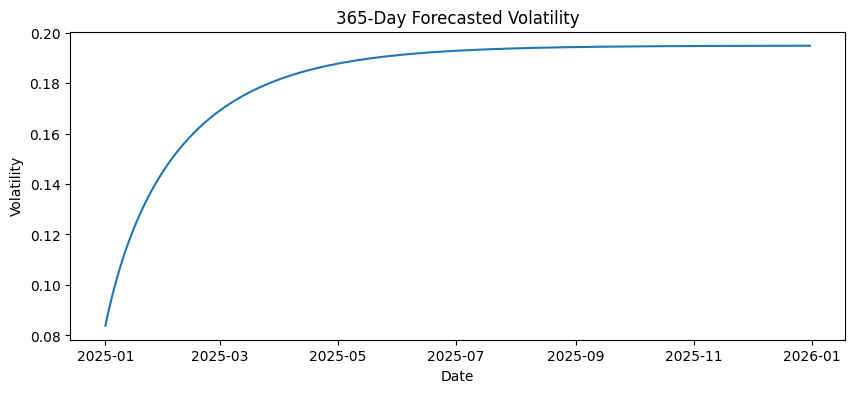

In [ ]:
from datetime import timedelta

forecast_horizon = 365
forecasts = model_fit.forecast(horizon=forecast_horizon, reindex=False)

# Create a date range for the forecasted period
last_date = df.index[-1]
forecast_dates = [last_date + timedelta(days=i) for i in range(1, forecast_horizon + 1)]

# Extract the variance (volatility squared)
forecasted_variance = forecasts.variance.values[-1, :]

# Calculate volatility by taking the square root of the variance
forecasted_volatility = np.sqrt(forecasted_variance)

# Plot forecasted volatility
plt.figure(figsize=(10, 4))
plt.plot(forecast_dates, forecasted_volatility)
plt.title('365-Day Forecasted Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()
